# Simple Linear Regression (Top Rated Movie Prediction)

Penjelasan Kolom:
- Popularity = popularitas film
- Release Date = tanggal rilis film
- Title = judul film
- Vote Average = rata-rata vote/penilaian film

## A. Data Preparation

### A.1 Import Libraries

In [228]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### A.2 Load Data

In [ ]:
try:
    df = pd.read_csv('Top_Rated_Movies.csv')
    print("Berhasil membaca data")
except Exception as e:
    print("Gagal membaca data")

Berhasil membaca data


### A.3 Cek Dimensi Data

In [230]:
df.shape

(964, 4)

### A.4 Cek Informasi Data

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    964 non-null    float64
 1   release_date  964 non-null    object 
 2   title         964 non-null    object 
 3   vote_average  964 non-null    float64
dtypes: float64(2), object(2)
memory usage: 30.3+ KB


### A.5 Cek Data Teratas & Terbawah Data

In [232]:
df.head()

,popularity,release_date,title,vote_average
0,174.522,9/23/1994,The Shawshank Redemption,8.706
1,165.677,3/14/1972,The Godfather,8.690
2,174.522,9/23/1994,The Shawshank Redemption,8.706
3,165.677,3/14/1972,The Godfather,8.690
4,47.916,12/20/1997,Life Is Beautiful,8.449


In [233]:
df.tail()

,popularity,release_date,title,vote_average
959,23.525,5/17/2018,Slender Man,4.301
960,13.800,3/23/2016,The Visitors: Bastille Day,4.100
961,12.215,3/12/1999,Baby Geniuses,4.109
962,20.010,1/25/2007,Epic Movie,3.853
963,32.961,5/22/2015,The Human Centipede 3 (Final Sequence),3.750


### A.6 Cek Data Duplikat

In [234]:
df.duplicated().sum()

np.int64(2)

In [235]:
df.drop_duplicates(inplace=True)

### A.7 Cek Data Hilang

In [236]:
df.isna().sum()

popularity      0
release_date    0
title           0
vote_average    0
dtype: int64

## B. Preprocessing

In [237]:
df.columns

Index(['popularity', 'release_date', 'title', 'vote_average'], dtype='object')

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 962 entries, 0 to 963
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    962 non-null    float64
 1   release_date  962 non-null    object 
 2   title         962 non-null    object 
 3   vote_average  962 non-null    float64
dtypes: float64(2), object(2)
memory usage: 37.6+ KB


In [239]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 962 entries, 0 to 963
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   popularity    962 non-null    float64       
 1   release_date  962 non-null    datetime64[ns]
 2   title         962 non-null    object        
 3   vote_average  962 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 37.6+ KB


## C. Exploratory Data Analysis (EDA)

### C.1 Cek Data Outliers

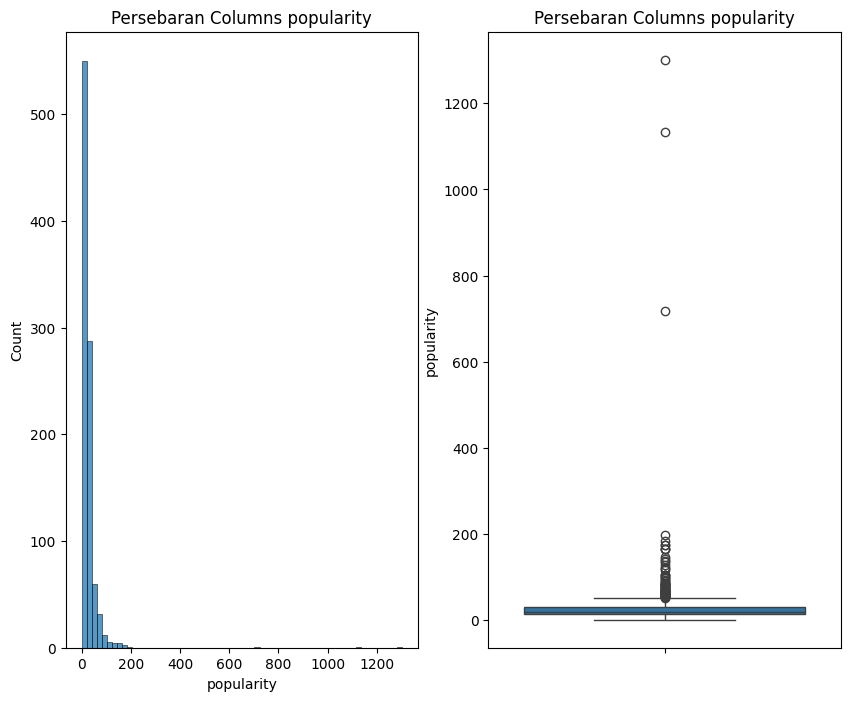

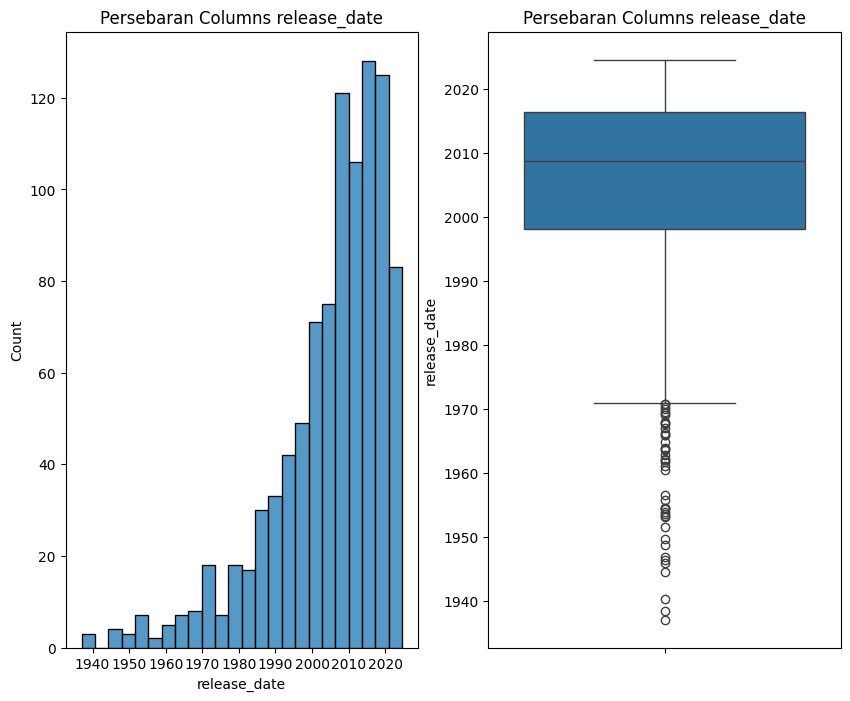

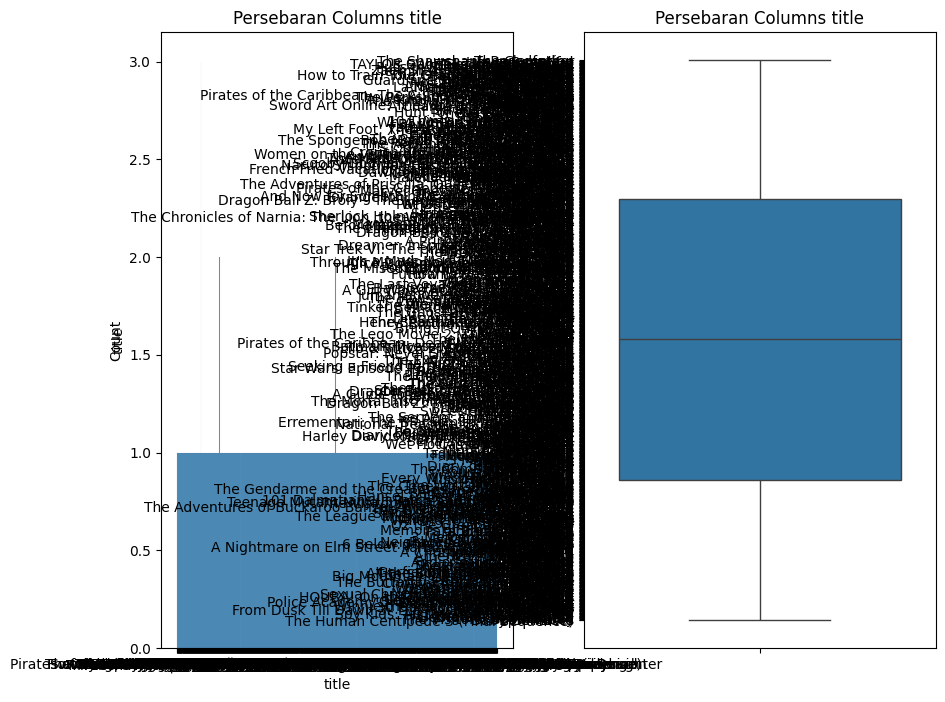

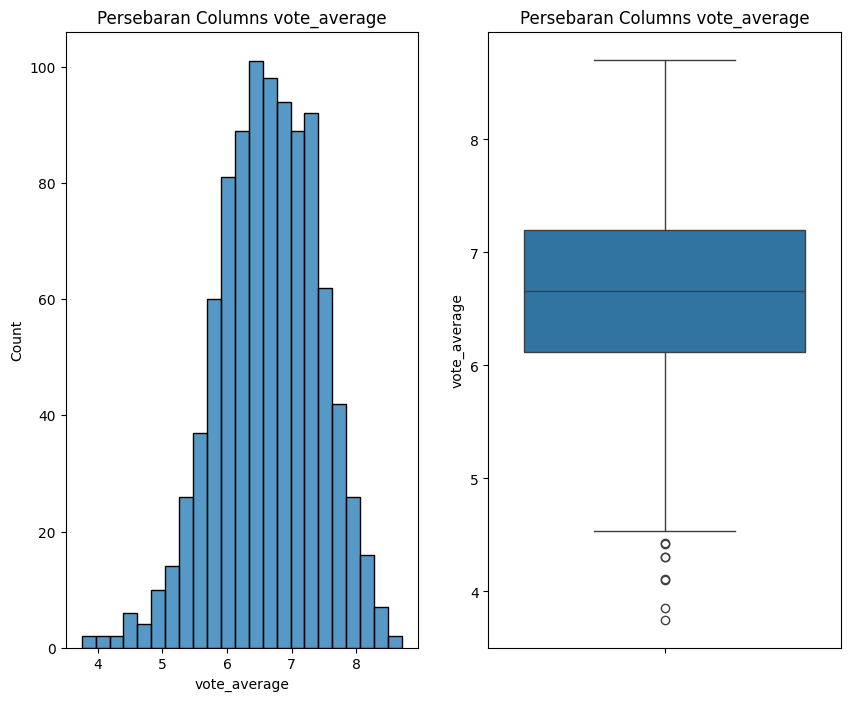

In [241]:
for col in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(10, 8))
    sns.histplot(df[col], ax = axes[0])
    axes[0].set_title(f"Persebaran Columns {col}")
    
    sns.boxplot(df[col], ax = axes[1])
    axes[1].set_title(f"Persebaran Columns {col}")
    
plt.show()

### C.2 Cek Visualisasi Linear Data

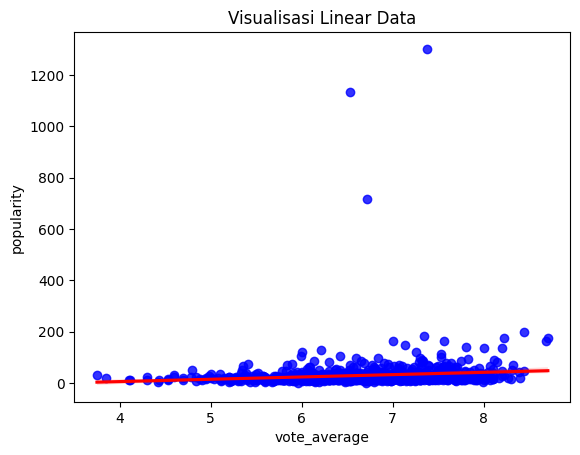

In [242]:
sns.regplot(data=df, x='vote_average', y='popularity', color='blue', line_kws={'color' : 'red'})
plt.title("Visualisasi Linear Data")
plt.show()

### C.3 Cek Korelasi Data

In [243]:
df_clean = df[['popularity', 'vote_average']]

<Axes: >

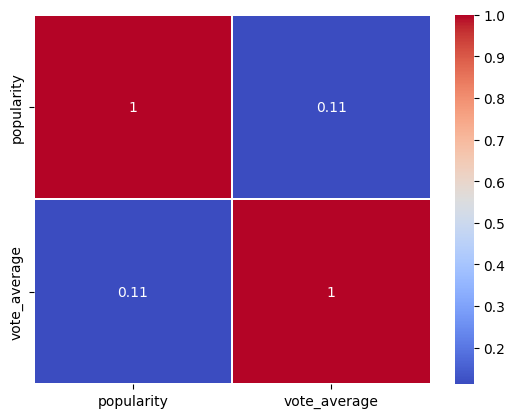

In [244]:
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm', linewidths=1.1)

## D. Modelling

### D.1 Buat Variabel X dan Y

In [245]:
X_data = df_clean[['vote_average']].values
y_data = df_clean[['popularity']].values

### D.2 Tambah Bias di Setiap Nilai X

In [246]:
ones = np.ones((len(X_data), 1))
X_matrix = np.concatenate((ones, X_data), axis=1)

### D.3 Splitting Data TrainTest X dan Y

In [247]:
# 1. Acak urutan data (Shuffling)
np.random.seed(42) # Biar hasilnya acak konsisten
indices = np.random.permutation(len(X_matrix))

# 2. Tentukan ukuran data test, disini kami ambil 20%
test_size = int(len(X_matrix) * 0.2)

# 3. Pisahkan Index
test_idx = indices[:test_size] #untuk tes 20%
train_idx = indices[test_size:] #untuk train sisanya yaitu 80%

# 4. Buat Variabel Train & Test
X_train, X_test = X_matrix[train_idx], X_matrix[test_idx]
y_train, y_test = y_data[train_idx], y_data[test_idx]

### D.4 Menghitung Theta Menggunakan Rumus Normal Equation

In [248]:
theta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

y_pred = X_test @ theta
y_pred_train = X_train @ theta

### D.5 Hasil Modelling 

In [249]:
intercept = theta[0][0]
slope = theta[1][0]

print("======= Hasil Modelling =======")
print(f"Intercept (Popularitas Awal) C = {intercept:.2f}")
print(f"Slope (Kenaikan Popularitas Per-Vote) X = {slope:.2f}")
print(f"Rumus Popularitas y = {intercept:.2f} + {slope:.2f}x")

======= Hasil Modelling =======
Intercept (Popularitas Awal) C = -42.65
Slope (Kenaikan Popularitas Per-Vote) X = 10.63
Rumus Popularitas y = -42.65 + 10.63x


### D.6 Visualisasi Hasil Regresi

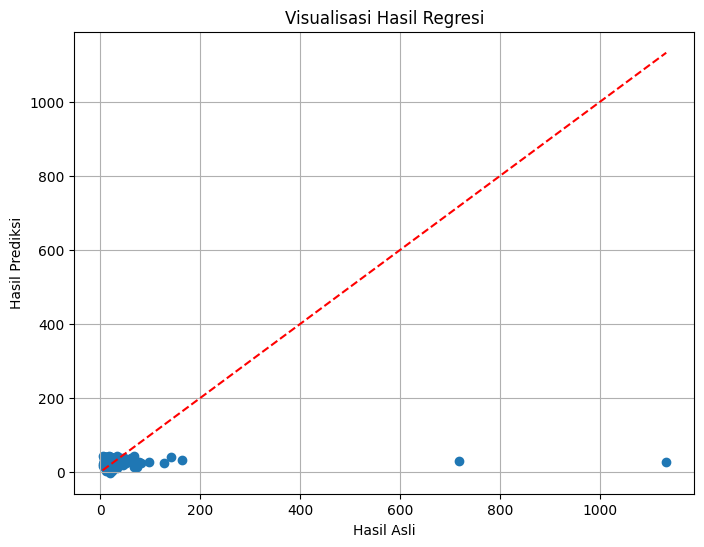

In [250]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.title("Visualisasi Hasil Regresi")
plt.xlabel("Hasil Asli")
plt.ylabel("Hasil Prediksi")
plt.grid(True)
plt.show()

## E. Evaluasi

### E.1 Menghitung MSE

In [251]:
error = y_test - y_pred
error_train = y_train - y_pred_train
mse = np.sum(error ** 2)
mse

np.float64(1797654.4115760329)

### E.2 Menghitung MAE

In [252]:
mae = np.sum(abs(error))
mae

np.float64(4783.63571341378)

### E.3 Menghitung RMSE

In [253]:
rmse = np.sqrt(mse)
rmse

np.float64(1340.766352343328)

### E.4 Menghitung R-Squared (Akurasi)

In [258]:
ss_residual = np.sum(error ** 2)
ss_total = np.sum((y_data - np.mean(y_data)) ** 2)
r2_score = 1 - ss_residual / ss_total
r2_score

np.float64(0.5284379411094662)